In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
data = pd.read_csv('data/churn.csv')
data = data.drop('RowNumber',axis=1)
data.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

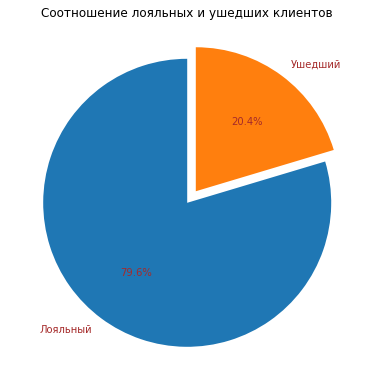

In [4]:
data['Type_client'] = data['Exited'].apply(lambda elem: 'Ушедший' if elem == 1 else 'Лояльный')
task1 = data['Type_client'].value_counts()
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(task1, labels=task1.index,
    autopct='%.1f%%', explode = [0, 0.1],
    textprops=dict(color='brown'),
    startangle=90)
axes.set_title('Соотношение лояльных и ушедших клиентов');

*Вывод: Доля клиентов лояльных банку достаточно высока (почти 80%), но есть над чем работать*

2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

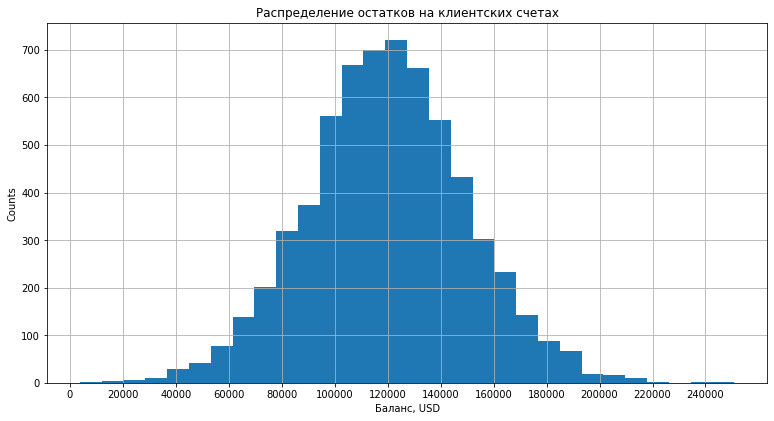

In [5]:
task2 = data[data['Balance'] > 2500]['Balance']
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0,0,1,1]) 
axes.hist(task2, bins=30)
axes.set_title('Распределение остатков на клиентских счетах')
axes.set_xlabel('Баланс, USD')
axes.set_xticks(np.arange(0,250000,step=20000))
axes.set_ylabel('Counts')
axes.grid();

*Вывод: Распределение остатков на счетах клиентов близко к нормальному распределению. Наибольшее количество клиентов имеют остаток около 120 тыс. дол. У основной массы клиентов сумма остатков лежит в диапазоне от 90 до 150 тыс. дол*

3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

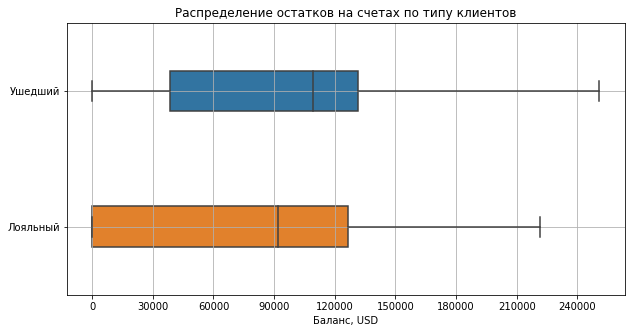

In [6]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data=data,
    y='Type_client',
    x='Balance',
    orient='h',
    width=0.3)
boxplot.set_title('Распределение остатков на счетах по типу клиентов')
boxplot.set_xlabel('Баланс, USD')
boxplot.set_ylabel('')
boxplot.set_xticks(np.arange(0,250000,step=30000));
boxplot.grid()

*Вывод: Ушедшие клиенты располагали большими средствами на счетах, нежели лояльные клиенты. Вероятно условия обслуживание и тарифы банка не предполагают программы лояльности более состоятельных клиентов, либо банки-конкуренты предлагают более выгодные условия для этой категории вкладчиков. Кроме того, На диаграмме мы видим большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом. Стоит отдельно рассмотреть клиентов с нулевым балансом.*

4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

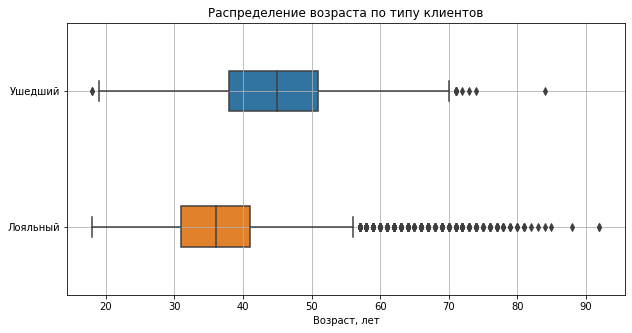

In [7]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data=data,
    y='Type_client',
    x='Age',
    orient='h',
    width=0.3)
boxplot.set_title('Распределение возраста по типу клиентов')
boxplot.set_xlabel('Возраст, лет')
boxplot.set_ylabel('')
boxplot.grid()

*Вывод: Основную массу ушедших клиентов составляют люди среднего возроаста, в то время как лояльные клиенты в основном молодежь. При этом в группе лояльных клиентов наблюдается болшее количество выбросов. Банку определенно надо обратить внимание на клиентов среднего и старшего возраста.*

5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

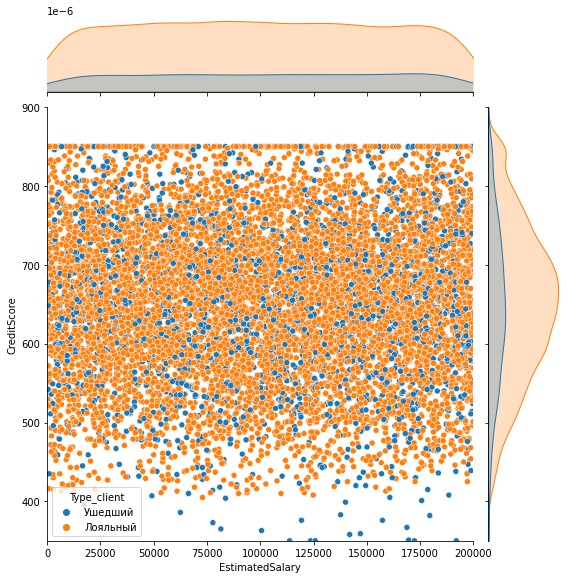

In [8]:
jointplot = sns.jointplot(
    data=data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Type_client',
    xlim = (0, 200000),
    ylim = (350, 900),
    height=8,
)

*Вывод: Взаимосвязи между размером заработной платы и кредитного рейтинга не выявлено. Только у ушедших клиентов есть рейтинг ниже 400.*

6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

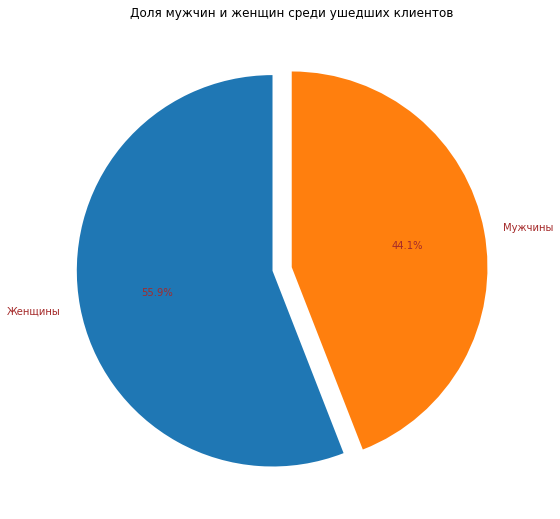

In [9]:
gone = data[data['Type_client'] == 'Ушедший']
fig, axes = plt.subplots(figsize=(9, 9))
axes.pie(
gone['Gender'].value_counts(), # берем данные об ушедших клиентах
labels=['Женщины', 'Мужчины'],
autopct='%.1f%%',   #округление до первого знака после запятой
explode=[0.1, 0],   #доля смещения от центра
startangle=90,
textprops=dict(color='brown')
)
axes.set_title('Доля мужчин и женщин среди ушедших клиентов');

*Вывод: Доля женщин среди ушедших клиентов банка превышает мужчин и составляет почти 56%, Таким образом они чаще прекращают сотрудничество и банку следует обратить внимание на эту категорию клиентов.*

7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

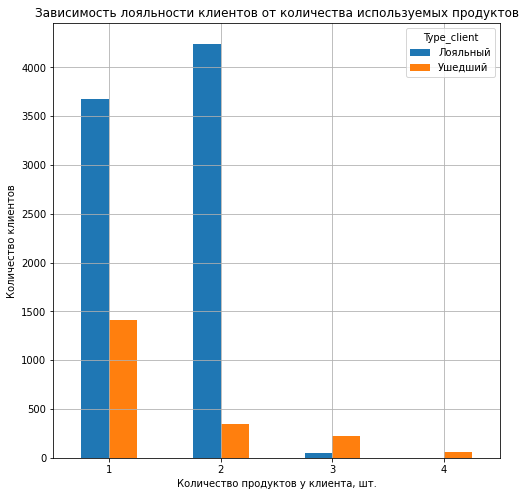

In [10]:
pivot_1 = data.pivot_table('CustomerId', index='NumOfProducts', columns='Type_client', aggfunc='count')
pivot_1 = pivot_1.fillna(0) # заменяем на 0 возможные пропуски данных

fig_7, axes_7 = plt.subplots(figsize=(8, 8))
pivot_1.plot(kind='bar',ax=axes_7 )
axes_7.set_title('Зависимость лояльности клиентов от количества используемых продуктов')
axes_7.set_xlabel('Количество продуктов у клиента, шт.')
axes_7.set_ylabel('Количество клиентов')
axes_7.tick_params(axis='x', labelrotation = 0)
axes_7.grid()

*Вывод: Увеличение количества приобретенных услуг не сказывается на лояльности клиентов. Самое большое количество ушедших клиентов воспользовались только одним продуктом банка. Довольно печальная картина с клиентами, которые воспользовались 3 и 4 продуктами, там доля ушедших клиентов намного превышает лояльных, а с 4-мя продуктами так вообще составляет 100%.*

8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [25]:
data['Type_active'] = data['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Без статуса')
df = px.data.tips()
fig = px.histogram(data, x="Type_client", color='Type_active', 
                   barmode='group', title='Соотношение наличия статуса "активного клиента" среди ушедших и лояльных клиентов',
                   width=800,
                   height=400)
fig.show()


*Вывод: Среди ушедших клиентов преобладают те, кто не обладал статусом активного клиента, в то время как среди лояльных преобладают активные клиенты. Что выглядит странным учитывая тот факт, что остатки на счетах ушедших клиентов в среднем выше чем у лояльных. В качестве рекомендации можно предложить банку внедрить более гибкую систему предоставления статуса Активного клиента.*

9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [13]:
country = data['Geography'].value_counts().index
percent_gone = []
for elem in country:
    mask = (data['Geography']==elem) & (data['Type_client']=='Ушедший')
    res =  data[mask]['Exited'].sum() *100 / data[data['Geography']==elem]['Exited'].count()
    percent_gone.append(res)
fig = px.choropleth(
    locations=country,
    locationmode = "country names",
    color=percent_gone, 
    range_color=[0, 40],
    title='Доля ущедших клиентов по странам', 
    width=800, 
    height=500,
    color_continuous_scale='Reds'
)
fig.show()
    

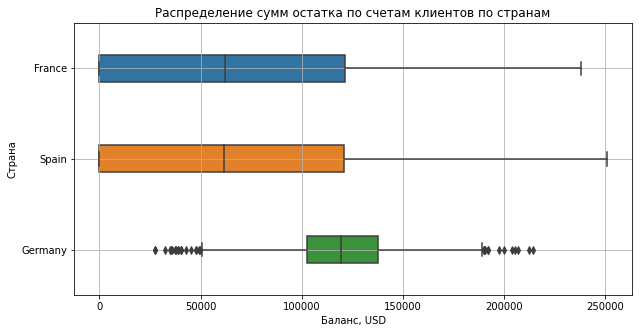

In [14]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data=data,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.3)
boxplot.set_title('Распределение сумм остатка по счетам клиентов по странам')
boxplot.set_xlabel('Баланс, USD')
boxplot.set_ylabel('Страна')
boxplot.grid()

*Вывод: Наибольшая доля ушедших клиентов в Германии (32.44%). Дополнительный анализ показывает, что остатки на счетах немецких клиентов значительно выше, чем в других странах. (Медианный баланс в Германии в 2 раза больше) Так же в немецком филиале банка, средний возраст ушедших клиентов существенно превышает возраст лояльных клиентов. Что еще раз доказывает гипотезу о том, что условия обслуживания банка не в полной мере отвечают потребностям состоятельных клиентов среднего и старшего возраста*

10. Переведите числовой признак CreditScore в категориальный. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

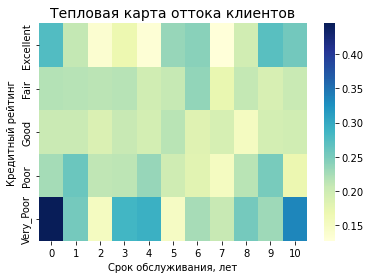

In [15]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
data['CreditScoreCat'] = data['CreditScore'].apply(get_credit_score_cat)
task10 = data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
task10
heatmap = sns.heatmap(data=task10, cmap='YlGnBu')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=14)
heatmap.set_xlabel('Срок обслуживания, лет')
heatmap.set_ylabel('Кредитный рейтинг');


*Вывод:Клиенты со сроком обслуживания менее года и соответственно минимальным кредитным рейтингом прекращают обслуживаться в банке чаще всего*